# **Classification du genre musical d'une chanson ou d'un artiste**

## **I. Introduction**


### But de l'étude 

L'identification du genre musical auquel appartient une musique ou un artiste est une tâche complexe qui peut être abordée à travers des méthodes de machine learning. Cette problématique soulève des enjeux importants pour l'industrie musicale, notamment dans le cadre de la **recommandation de musique personnalisée, de la création de playlists automatisées, ou encore de la classification de contenu pour les plates-formes de streaming**.

De nombreuses études ont exploré différentes techniques de classification de genre musical à travers des méthodes de traitement du signal et d'analyse acoustique, mais également à travers des approches basées sur les réseaux de neurones et l'apprentissage automatique. Par exemple, l'étude de Tzanetakis et Cook (2002) a proposé une méthode de classification de genre musical basée sur l'analyse de caractéristiques temporelles et fréquentielles des signaux audio. D'autres études, comme celle de Lee et al. (2018), ont exploré l'utilisation de réseaux de neurones pour la classification de genre musical à partir de données provenant de Spotify.

Cependant, malgré ces avancées, l'identification du genre musical reste une tâche complexe en raison de la variabilité des caractéristiques acoustiques des genres musicaux, mais aussi de la subjectivité de la classification de genre musical en général. C'est pourquoi de nouvelles approches et méthodes sont nécessaires pour améliorer la précision de la classification de genre musical.

Dans ce contexte, ce projet de machine learning a pour objectif **d'explorer différentes techniques de classification de genre musical** à partir de données de musique et d'artistes, en utilisant des approches basées sur **l'inférence bayésienne et l'apprentissage supervisé**. Nous chercherons à développer un modèle précis et robuste capable de classifier automatiquement le genre musical auquel appartient une musique ou un artiste.

### Source des données

Pour ce projet de classification de genre musical, nous avons utilisé l'API Spotify pour créer une playlist contenant environ 2800 musiques de 4 genres différents : **le rap, le rock, l'électro et la musique classique**. Ces genres musicaux ont été choisis afin de ne pas alourdir le sujet avec une multitude de genres et de sous-genres, tout en permettant une mise en pratique efficace des méthodes de classification étudiées en cours. Ils ont également été sélectionnés car ils présentent des caractéristiques acoustiques distinctes qui permettront à notre modèle de classification de mieux apprendre les différences entre les genres et de les classifier avec précision. De plus, ces genres sont très populaires et représentatifs de l'industrie musicale, ce qui leur confère une certaine pertinence pour notre étude.

Nous avons extrait les données pour notre projet de classification de genre musical en utilisant **l'API Spotify**. Nous avons commencé par extraire les caractéristiques audio des playlists de Spotify de chacun des 4 genres sélectionnés (rap, rock, électro et musique classique) et avons regroupé ces données dans un fichier CSV. Ensuite, nous avons extrait les mêmes caractéristiques pour plusieurs playlists d'artistes sur lesquels nous avons tester nos modèles de classification. Le code source de la création des données est présente dans le dossier 'creation_data'. Nous avons fait le choix d'utiliser l'API Spotify afin d'avoir la main complète sur notre dataset et d'en connaître parfaitement les biais. 

## **II. Visualisation**

### La forme des fichiers

Nous disposons donc d'un fichier csv avec un medley de chansons des 4 genres musicaux et leurs caractéristiques acoustiques. Ces caractéristiques ont été créées par Spotify et fournissent des informations telles que le tempo, l'énergie de la musique... Le détail de ces caractéristiques est donné sur le site de l'API : https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features.
Dans la création du fichier csv nous avons gardé les features qui concernaient la partie musicale et supprimé les données qualitatives telles que l'uri (url)... Ainsi il prend la forme :

In [1]:
import pandas as pd
data = pd.read_csv('data/all.csv')
data

,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,speechiness,liveness,valence,tempo,duration_ms,time_signature,genre
0,85,0.310,0.700,9,-5.678,1,0.011000,0.009650,0.0470,0.0828,0.763,188.386,255493,4,rock
1,83,0.933,0.528,5,-6.472,0,0.112000,0.312000,0.1610,0.1630,0.754,109.967,214653,4,rock
2,68,0.370,0.919,4,-5.721,1,0.000376,0.419000,0.1020,0.4900,0.471,134.021,344240,4,rock
3,66,0.447,0.954,8,-8.069,1,0.023500,0.403000,0.0751,0.2980,0.331,123.453,272027,4,rock
4,39,0.598,0.737,1,-13.463,1,0.022700,0.000000,0.1000,0.1350,0.806,144.790,176973,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,68,0.599,0.622,10,-4.313,0,0.124000,0.002780,0.2640,0.1580,0.199,91.615,199827,4,rap
2822,66,0.565,0.569,6,-6.084,0,0.035200,0.000009,0.3790,0.1060,0.303,92.466,214825,5,rap
2823,58,0.851,0.605,5,-6.860,0,0.122000,0.000000,0.5210,0.4150,0.562,142.892,161119,4,rap
2824,73,0.737,0.564,4,-7.045,0,0.436000,0.000000,0.1050,0.3510,0.528,90.000,163504,4,rap


Pour ce qui est des artistes dont nous allons étudier l'appartenance à un genre leur fichier csv se présente ainsi :

In [2]:
#Playlist Beethoven de Spotify
pd.read_csv('data/artists/jezzybazz.csv')

,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,speechiness,liveness,valence,tempo,duration_ms,time_signature,genre
0,59,0.815,0.462,10,-7.772,0,0.5790,0.000000,0.0505,0.1100,0.5290,133.005,206920,4,rap
1,56,0.873,0.456,11,-9.718,0,0.3120,0.000171,0.3110,0.1830,0.5910,119.985,228220,4,rap
2,51,0.812,0.618,0,-7.228,1,0.3130,0.000000,0.2350,0.1210,0.4620,136.954,210453,4,rap
3,48,0.874,0.547,2,-9.285,1,0.0318,0.000000,0.3430,0.1130,0.6500,147.952,183814,4,rap
4,50,0.816,0.627,0,-11.090,0,0.4540,0.000329,0.3650,0.0636,0.3600,145.031,229080,4,rap
5,50,0.888,0.612,1,-7.449,1,0.1040,0.000004,0.4400,0.0660,0.4070,135.984,218910,4,rap
6,42,0.672,0.526,6,-9.214,0,0.3820,0.000000,0.4060,0.0831,0.5770,139.918,157067,4,rap
7,46,0.767,0.534,2,-6.381,1,0.2650,0.000000,0.3590,0.0896,0.0618,139.978,229760,4,rap
8,47,0.689,0.457,0,-8.163,0,0.0878,0.000687,0.0434,0.0830,0.1820,117.928,239173,4,rap
9,52,0.672,0.723,2,-7.586,0,0.5440,0.000000,0.1730,0.0634,0.3330,83.974,205047,4,rap


### Analyse des données

#### Forme générale

Pour avoir une visualisation d'ensemble des données, il peut être intéressant de visualiser les relations entre par paires des features. Pour se faire nous pouvons utiliser la fonction pairplot de seaborn.

In [3]:
import seaborn as sns
#sns.pairplot(data, hue = 'genre')

La fonction étant assez longue à exécuter nous avons l'image enregistrée directement affichée ci-dessous.

<p align="center">
  <img src="pairplot.png" alt="le pairplot du data set, colorié par genre">
</p>


Avec ce premier plot nous pouvons remarquer plusieurs choses :

- Trois de nos features sont discètes : key, mode, time_signature qui correspondent respectivement à la clé, la modalité (majeur ou mineur) et la signature rythmique (nombre de temps dans une mesure)
- L'energy et la loudness semble être correlées
- Pour toutes les variables continues, leur distribution semble gaussienne

Nous voyons également que le classique se distingue généralement des autres genres pour plusieurs features. On peut zoomer sur un graphique en particulier pour mieux observer cette distinction.

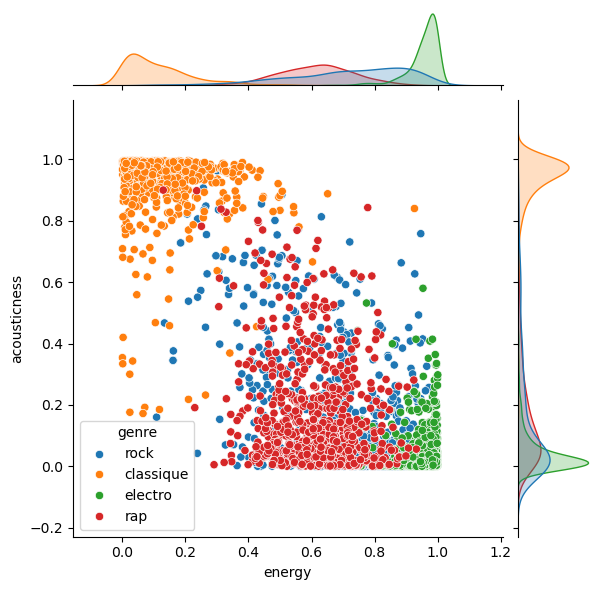

In [4]:
sns.jointplot(data = data, y ='acousticness', x =  'energy', hue = 'genre')

### Corrélation

Une fois nos données visualisées, il est important de comprendre les différentes corrélations entre nos features pour l'analyse future. En effet, si deux variables sont corrélées elles ne pourront pas être indépendantes. Ces liens sont importants pour le choix de nos algorithmes. Effectivement, en vertu du théorème de No Free Lunch nous devons comprendre le contexte et les spécificités de nos données. Pour se faire, nous pouvons tracer la matrice de corrélation entre nos features.

/tmp/ipykernel_2636712/3737903870.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cbar_kws={'label': 'Corrélation'})


<Axes: title={'center': 'Matrice de corrélation des features'}>

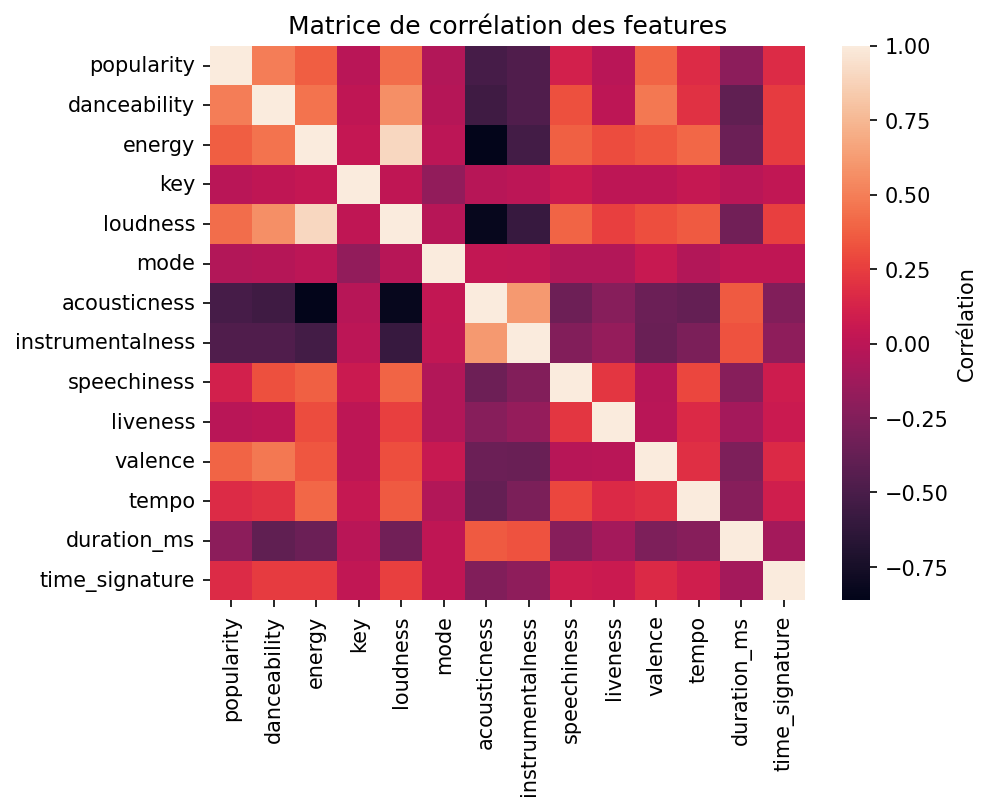

In [5]:
import matplotlib.pyplot as plt

plt.figure(dpi = 150)
plt.title('Matrice de corrélation des features')
sns.heatmap(data.corr(), cbar_kws={'label': 'Corrélation'})

Nous voyons bien que la loudness et l'energy sont fortement correlées. Il faudra avoir cela en tête pour le reste de l'étude.

### Distance euclidienne 

Enfin, en étude préliminaire il est pertinent de visualiser la matrice des distances euclidiennes entre les genres afin de voir la similarité entre les différents genres musicaux. En utilisant cette matrice, nous pouvons identifier les genres qui sont les plus proches ou les plus éloignés les uns des autres en termes de caractéristiques musicales. Cette information peut nous aider à comprendre comment les différents genres se distinguent les uns des autres et comment les algorithmes de classification pourraient être influencés par ces différences.

Par exemple, si deux genres sont très proches en termes de caractéristiques musicales, cela pourrait signifier que l'algorithme aura plus de difficulté à les distinguer, tandis que si deux genres sont très différents, l'algorithme pourrait avoir une meilleure performance de classification.

<Axes: title={'center': 'Distance euclidienne entre les genres musicaux'}>

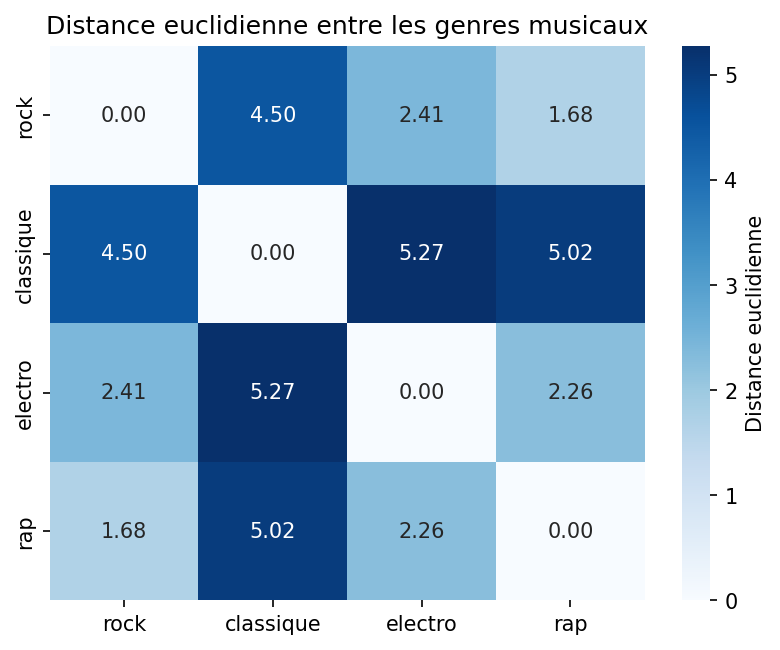

In [7]:
import numpy as np
from scipy.spatial.distance import cdist
from normalisation import normalisation

#On normalise les données grâce à une fonction spécialement écrite pour nos données
data = pd.read_csv('data/all.csv')
data2 = normalisation(data.drop(['genre', 'mode', 'key', 'time_signature'], axis = 1))
data.loc[:, data.columns.difference(['genre', 'mode', 'key', 'time_signature'])] = data2

# On extrait les colonnes correspondant aux features, on élimine la colonne 'genre'
features_cols = data.columns[:-1]

# On crée un dictionnaire de genres et de leurs features
genres = {}
for genre in data["genre"].unique():
    genre_data = data[data["genre"] == genre] #sélectionne un genre
    genre_vector = np.mean(genre_data[features_cols], axis=0) #calcule la moyenne de chaque feature
    genres[genre] = genre_vector #l'entre dans le dictionnaire

    
# Calcul de la matrice des distances euclidiennes entre les genres
matrice = cdist(list(genres.values()), list(genres.values()), metric='euclidean')


plt.figure(dpi = 150)
plt.title("Distance euclidienne entre les genres musicaux")


sns.heatmap(matrice,  annot=True,fmt=".2f",
            xticklabels= data["genre"].unique(),
            yticklabels= data["genre"].unique(),
            cmap = 'Blues',
            cbar_kws={'label': 'Distance euclidienne'})

On voit que le rap et le rock sont très proches et que l'électro les suit de près. Cela peut-être un biais de nos données liées au choix des chansons rap et électro. En effet, ce sont deux genres qui possèdent une multitude de sous-genres on peut donc supposer que les chansons prises sont plus proches de sous-genres se rapprochant du rock. 

Si la distance euclidienne entre deux genres est trop faible, cela signifie que les caractéristiques musicales de ces genres sont très similaires et donc plus difficiles à distinguer. Certains algorithmes pourraient avoir du mal dans ce cas tels que les classifieurs linéaires tels que la régression logistique ou le SVM linéaire, car ils cherchent une frontière de décision linéaire pour séparer les classes, et des classes similaires peuvent être difficiles à séparer de cette manière ou les algorithmes basés sur les k plus proches voisins comme KNN, car ils se basent sur la proximité des échantillons pour effectuer la classification.

En revanche, d'autres algorithmes peuvent ne pas être affectés par la faible distance euclidienne entre les genres, tels que les arbres de décision, car ils peuvent trouver des séparations non linéaires qui sont plus adaptées aux données qui ont des caractéristiques similaires entre les classes.

## **III. Les approches** : bayésienne et machine learning

Nous avons selectionné plusieurs algorithmes d'apprentissage supervisé qui sont pertinents dans un problème de classification avec plus de deux classes.

### **1. L'approche bayésienne**

Dans le cas de la classification de chansons d'un artiste dans un genre musical, nous pouvons utiliser une approche bayésienne pour prédire à quel genre appartient chaque chanson.

La formule de Bayes nous permet de calculer la probabilité qu'une chanson appartienne à un genre donné, en fonction de la probabilité de chaque features de la chanson pour ce genre. Nous utilisons également les probabilités a priori des genres musicaux $P(G_k)$, c'est-à-dire la probabilité qu'une chanson appartienne à un genre avant même de connaître ses caractéristiques. Nous supposons ces probabilités pour chaque genre comme équiprobables.

Ainsi, on calcule pour chaque genre $G_k$ sachant la caractéristique $F_i$ à l'itération i la probabilité que la chanson appartienne au genre k par la formule de Bayes suivante :


$$P(G_k|F_i) = \frac{P(F_i|G_k)P(G_k)}{\sum_{k=1}^4 P(G_k)P(F_i|G_k)}$$ 

où $P(G_k)$ est remplacée à chaque itération par $P(G_k|F_i)$ et où $P(F_i|G_k)$ est calculée grâce à la fonction scipy qui renvoie la valeur de la densité de probabilité pour la valeur de la feature $F_i$. Le code suivant permet un tel calcul.

Les features dont la distributions n'est pas gaussienne ont été éliminées. De plus, les deux features corrélées également ('loudness' et 'energy') puisque la formule de Bayes suppose une indépendance des features utilisées. En effet, lorsque deux features sont corrélées, cela signifie qu'elles fournissent des informations similaires, ce qui peut entraîner une sur-représentation de ces informations dans le modèle. 

In [8]:
import scipy.stats as st

#Formule de bayes appliquée pour une chanson

def bayesian_features(data, i, All): 
    """ 
    data : playlist d'un artiste
    i : numéro de la chanson
    All : dataset
    
    """
    
    proba_list = []
    
    for genre in pd.unique(All['genre'].values): #prend les genres qui apparaissent dans le data set
        
        proba = 0.25 #équiprobabilité à priori des genres
        
        cond = All['genre'] == genre #sélection des données d'un même genre
        
        #Formule de bayes pour chaque feature
        for features in data.drop(['key','mode', 'time_signature', 'loudness', 'energy'], axis = 1).iloc[:, :-1].columns:
        
            mean = np.mean(All[cond][features].values) #moyenne pour un genre d'une feature
            sigma = np.std(All[cond][features].values, ddof = 1) #idem pour l'écart-type
            
            feature_value= data[features][i]
            
        
            pdf = st.norm.pdf(feature_value, mean, sigma)
            proba = proba*pdf
        
        proba_list.append(proba)
        
    proba_list = np.array(proba_list)/np.sum(proba_list)
    
    return proba_list
        
        

def bayesian_tracks(artist, All): #Prédiction sur toutes chansons d'un artiste
    
    y_pred = []
    
    for i in range(len(artist)):
        
        #Calcul des probabilités pour chaque genre
        proba = bayesian_features(artist, i, All)
        
        #On associe à la chanson le genre dont la probabilité est la plus haute
        genre = pd.unique(All['genre'].values)[np.argmax(proba)]
        
        y_pred.append(genre)
        
    return y_pred
        

On peut ainsi calculer les prédictions correctes pour chaque artiste.

In [9]:
import sklearn.metrics
import glob

All = pd.read_csv('data/all.csv')
csv_files = glob.glob('data/artists/*.csv') 
predict = []

for name in csv_files:
    
    data_artist = pd.read_csv(f'{name}')
    y_artist = data_artist.iloc[:, -1]
    
    y_pred_artist = bayesian_tracks(data_artist, All)
    
    predict.append(sklearn.metrics.accuracy_score(y_pred_artist, y_artist))
    print(round(sklearn.metrics.accuracy_score(y_pred_artist, y_artist),2), name[13:-4])

print('\n La moyenne du score des prédictions est de : ', round(np.mean(predict),3))

0.68 beatles
0.2 daftpunk
0.98 chopin
0.71 queen
0.99 beethoven
0.96 drake
0.82 bach
0.95 jezzybazz
0.64 drpeacock
0.9 ledzepplin
0.22 aphextwins
0.8 travisscott
0.24 chemicalbrothers
0.36 deadmau5
0.93 mozart
0.95 cardib
0.1 kraftwerk
0.8 rollingstones
1.0 brahms
0.96 jcole
0.93 kendricklamar
0.1 majorlazer
0.78 acdc

 La moyenne du score des prédictions est de :  0.696


Bien que l'approche bayésienne puisse donner de bons résultats pour la classification des chansons d'un artiste dans un genre musical, nous avons constaté que son taux de réussite est de 68% et qu'elle a des difficultés à classifier le genre musical de la musique électronique. Pour améliorer la précision de notre classification, nous pouvons utiliser des algorithmes d'apprentissage supervisé tels que l'arbre de décision, le random forest, le k-NN ou le réseau de neurones.

Ces algorithmes peuvent apprendre à partir des données d'entraînement et généraliser la classification pour de nouvelles données. Par exemple, l'arbre de décision peut apprendre des règles de décision simples à partir des caractéristiques des chansons, tandis que le random forest peut combiner plusieurs arbres de décision pour améliorer la précision. Le K-NN peut également classifier une chanson en se basant sur les caractéristiques de ses k chansons voisines, tandis que le réseau de neurones peut apprendre des représentations plus complexes et abstraites des caractéristiques de la musique.

En utilisant ces algorithmes d'apprentissage supervisé, nous espérons améliorer la précision de la classification de genre musical de la musique électronique et de manière générale, obtenir de meilleurs résultats de classification pour toutes les genres musicales.

### **2. Modèles de Machine de learning :**

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve, KFold
import keras.utils
import keras.models
import keras.layers
from normalisation import normalisation

2024-07-10 21:49:12.602479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Avant d'aborder les différents modèles d'apprentissage supervisé pour la classification des chansons d'un artiste dans un genre musical, nous allons normaliser nos données pour éviter que certaines caractéristiques aient un poids plus important que d'autres dans la classification et réduire le temps d'apprentissage de nos algorithmes.

La normalisation se fait à partir de la fonction normalisation du fichier éponyme. Elle appelle la fonction StandardScaler() permettant ainsi de normaliser les données csv des artistes de la même façon que le fichier d'entraînement 'all.csv'.

Nous divisons ensuite nos données en données de test et d'entraînement.

#### Preprocessing :

In [12]:
data = pd.read_csv('data/all.csv')
data2 = normalisation(data.drop(['genre', 'mode', 'key', 'time_signature'], axis = 1))
data.loc[:, data.columns.difference(['genre', 'mode', 'key', 'time_signature'])] = data2  #Normalisation des données

In [13]:
data.head()

,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,speechiness,liveness,valence,tempo,duration_ms,time_signature,genre
0,1.691132,-1.045699,0.309126,9,0.502835,1,-0.818231,-0.561485,-0.595009,-0.763087,1.617016,2.060461,-0.004898,4,rock
1,1.619735,2.097636,-0.220318,5,0.409712,0,-0.552523,0.349049,0.377354,-0.301501,1.580192,-0.428564,-0.258642,4,rock
2,1.084257,-0.742970,0.983245,4,0.497792,1,-0.846181,0.671282,-0.125887,1.580525,0.422293,0.334912,0.546498,4,rock
3,1.012860,-0.354468,1.090981,8,0.222409,1,-0.785347,0.623098,-0.355330,0.475482,-0.150520,-0.000517,0.097830,4,rock
4,0.049000,0.407400,0.423018,1,-0.410221,1,-0.787451,-0.590546,-0.142946,-0.462653,1.792951,0.676721,-0.492752,4,rock


In [14]:
y = data['genre'] #Segmentation des données
X = data.iloc[:, 0:-1]
print('X shape:',X.shape,'\ny shape:', y.shape)

X shape: (2826, 14) 
y shape: (2826,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
# Sépartion des données, en train et test set

### 1 - Decision Tree

Le premier algorithme que nous utilisons est l'arbre de décision (Decision Tree). C'est un modèle de classification qui fonctionne en divisant récursivement les données en sous-groupes homogènes en fonction de leurs caractéristiques jusqu'à ce que 'les feuilles de l'arbre' représentent les classes finales.

#### Entrainement :

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [17]:
y_pred = clf.predict(X_test)
print('Train score :',clf.score(X_train,y_train))
print('Test score :',clf.score(X_test,y_test))

Train score : 1.0
Test score : 0.8869257950530035


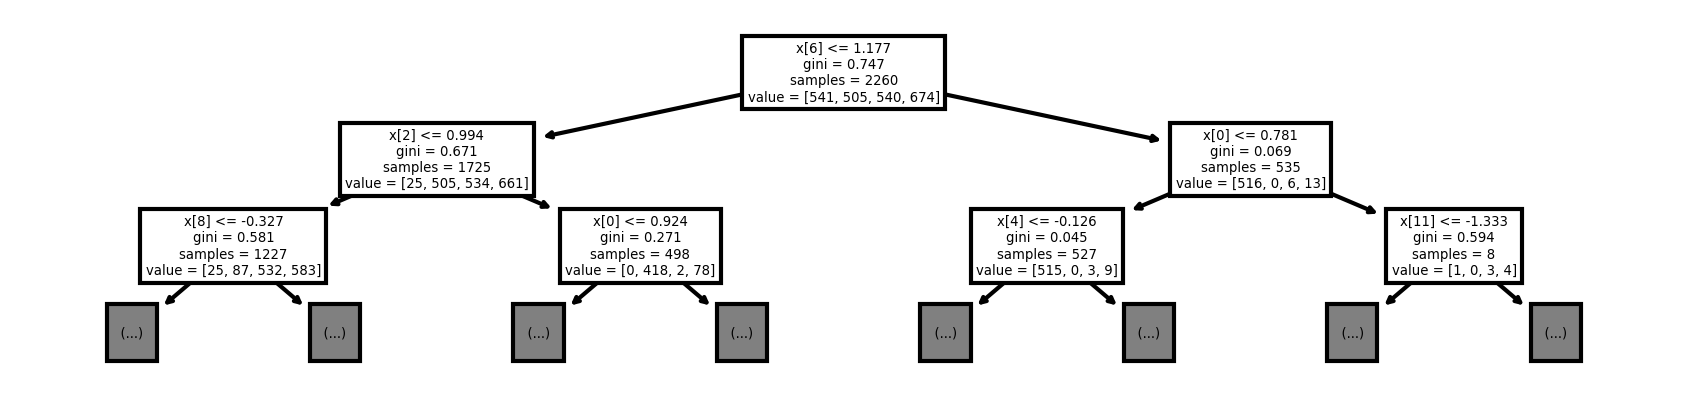

In [18]:

plt.figure(figsize=(7, 1.5), dpi=300)
tree.plot_tree(clf.fit(X_train, y_train), max_depth=2)
plt.show()

#### Prédiction de l'arbre de décision :

On obtient les prédictions suivantes.

In [19]:
csv_files = glob.glob('data/artists/*.csv') 

In [22]:
predict = []
for name in csv_files:
    data_artist = pd.read_csv(f'{name}')
    data2 = normalisation(data_artist.drop(['genre', 'mode', 'key', 'time_signature'], axis = 1))
    data_artist.loc[:, data_artist.columns.difference(['genre', 'mode', 'key', 'time_signature'])] = data2
    
    
    y_vrai = data_artist['genre']
    X_artist = data_artist.drop(['genre'],axis=1)
    
    predict.append(clf.score(X_artist, y_vrai))
    print(round(clf.score(X_artist, y_vrai),2), name[13:-4])
    
print('\n La moyenne du score des prédictions est de : ', round(np.mean(predict),3))

0.76 beatles
0.11 daftpunk
0.92 chopin
0.76 queen
0.94 beethoven
0.92 drake
0.88 bach
0.87 jezzybazz
0.98 drpeacock
0.86 ledzepplin
0.1 aphextwins
0.98 travisscott
0.36 chemicalbrothers
0.34 deadmau5
0.89 mozart
0.86 cardib
0.04 kraftwerk
0.78 rollingstones
0.95 brahms
0.9 jcole
0.82 kendricklamar
0.18 majorlazer
0.8 acdc

 La moyenne du score des prédictions est de :  0.696


### 2 - Random Forest

Un autre algorithme couramment utilisé dans les problèmes similaires au notre est l'algorithme de Random Forest. Cette méthode combine les résultats de plusieurs arbres de décision pour améliorer la précision de la classification.

#### Entrainement/Cross Validation : 

La paramètre déterminant pour cet algorithme est donc le nombre optimal d'arbres pour obtenir les meilleurs résultats.

Ainsi, nous pouvons utiliser une cross validation pour sélectionner le nombre d'arbres optimal, et nous assurer que notre modèle est bien adapté à nos données.

In [23]:
clf_forest = RandomForestClassifier()

In [24]:
cv = KFold(n_splits=5, shuffle=True)
nb_tree = np.arange(1,150,5)

In [25]:
train_score, val_score = validation_curve(clf_forest, X_train,
                                          y_train,
                                          param_name='n_estimators',
                                          param_range = nb_tree,
                                          cv = cv)

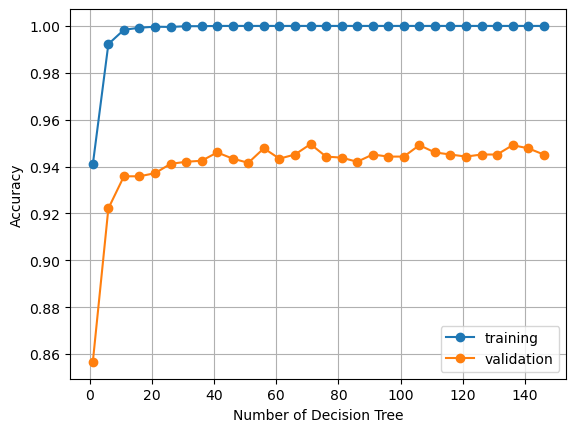

In [26]:
plt.plot(nb_tree,train_score.mean(axis=1),'o-',label='training')
plt.plot(nb_tree,val_score.mean(axis=1),'o-',label='validation')
plt.xlabel('Number of Decision Tree')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

A partir de 40 arbres, les performances se stabilisent. Ainsi nous fixons pour notre entraînement n_estimators à 50.

In [27]:
clf_forest = RandomForestClassifier(n_estimators=50)
clf_forest = clf_forest.fit(X_train,y_train)

In [28]:
print('Train score :',clf_forest.score(X_train,y_train))
print('Test score :',clf_forest.score(X_test,y_test))

Train score : 1.0
Test score : 0.9628975265017667


#### Prédiction Random Forest  :

On obtient les prédictions suivantes.

In [29]:
csv_files = glob.glob('data/artists/*.csv') 

In [30]:
predict = []
for name in csv_files:
    data_artist = pd.read_csv(f'{name}')
    data2 = normalisation(data_artist.drop(['genre', 'mode', 'key', 'time_signature'], axis = 1))
    data_artist.loc[:, data_artist.columns.difference(['genre', 'mode', 'key', 'time_signature'])] = data2
    
    
    y_vrai = data_artist['genre']
    X_artist = data_artist.drop(['genre'],axis=1)
    
    predict.append(clf_forest.score(X_artist, y_vrai))
    print(round(clf_forest.score(X_artist, y_vrai),2), name[13:-4])
    
print('\n La moyenne du score des prédictions est de : ', round(np.mean(predict),3))

0.92 beatles
0.07 daftpunk
1.0 chopin
0.92 queen
1.0 beethoven
0.92 drake
0.93 bach
0.92 jezzybazz
1.0 drpeacock
0.98 ledzepplin
0.08 aphextwins
0.96 travisscott
0.14 chemicalbrothers
0.16 deadmau5
1.0 mozart
0.91 cardib
0.02 kraftwerk
0.98 rollingstones
1.0 brahms
0.94 jcole
0.88 kendricklamar
0.06 majorlazer
0.96 acdc

 La moyenne du score des prédictions est de :  0.729


### 3 - K-Nearest Neighbors

KNN (K-Nearest Neighbors) est un algorithme d'apprentissage supervisé utilisé pour résoudre des problèmes de classification ou de régression. Il est basé sur la distance entre les échantillons dans un espace de caractéristiques, où chaque caractéristique représente une variable mesurée pour chaque échantillon.

L'algorithme KNN fonctionne en recherchant les k voisins les plus proches d'un échantillon inconnu dans l'espace de caractéristiques. Ensuite, la classe majoritaire parmi ces k voisins est assignée à l'échantillon inconnu. Ainsi, comme évoqué dans la data visualisation, on soupçonne cet algorithme d'être moins performant pour nos données notamment lorsqu'il s'agit de différencier du rap et du rock.

Avec cette difficulté il est d'autant plus important d'effectuer une cross validation afin de connaître le nombre k de voisins optimal pour nos données.

#### Entrainement/Cross Validation : 

In [31]:
knn = KNeighborsClassifier()

In [32]:
cv = KFold(n_splits=5, shuffle=True)
nb_neighbors = np.arange(1,50,1)

In [33]:
train_score, val_score = validation_curve(knn, X_train,
                                          y_train,
                                          param_name='n_neighbors',
                                          param_range = nb_neighbors,
                                          cv = cv)

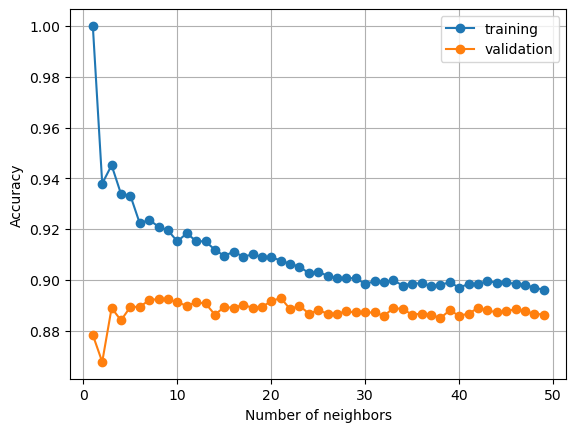

In [34]:
plt.plot(nb_neighbors,train_score.mean(axis=1),'o-',label='training')
plt.plot(nb_neighbors,val_score.mean(axis=1),'o-',label='validation')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

Le nombre optimal de voisin se situe alors entre 3 et 10. On décide de le fixer à 5 pour notre entraînement.

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train,y_train)

In [36]:
print('Train score :',knn.score(X_train,y_train))
print('Test score :',knn.score(X_test,y_test))

Train score : 0.9380530973451328
Test score : 0.911660777385159


#### Prediction K-NN  :

On obtient les prédictions suivantes.

In [37]:
csv_files = glob.glob('data/artists/*.csv') 

In [39]:
predict = []
tab_y_vrai = np.array([])
tab_y_pred = np.array([])

for name in csv_files:
    data_artist = pd.read_csv(f'{name}')
    data2 = normalisation(data_artist.drop(['genre', 'mode', 'key', 'time_signature'], axis = 1))
    data_artist.loc[:, data_artist.columns.difference(['genre', 'mode', 'key', 'time_signature'])] = data2
    
    
    y_vrai = data_artist['genre']
    X_artist = data_artist.drop(['genre'],axis=1)
    
    tab_y_vrai = np.concatenate((tab_y_vrai, y_vrai))
    tab_y_pred = np.concatenate((tab_y_pred, knn.predict(X_artist)))
    predict.append(knn.score(X_artist, y_vrai))
    print(round(knn.score(X_artist, y_vrai),2), name[13:-4])
    
print('\n La moyenne du score des prédictions est de : ', round(np.mean(predict),3))

0.82 beatles
0.16 daftpunk
0.98 chopin
0.71 queen
0.99 beethoven
0.91 drake
0.85 bach
0.85 jezzybazz
0.96 drpeacock
0.9 ledzepplin
0.24 aphextwins
0.93 travisscott
0.26 chemicalbrothers
0.4 deadmau5
0.94 mozart
0.86 cardib
0.1 kraftwerk
0.94 rollingstones
1.0 brahms
0.94 jcole
0.87 kendricklamar
0.16 majorlazer
0.88 acdc

 La moyenne du score des prédictions est de :  0.723


Text(0.5, 1.0, 'Matrice de confusion pour K-NN')

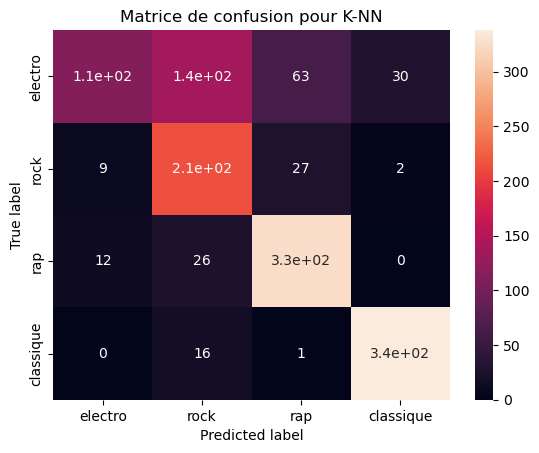

In [40]:
from sklearn.metrics import confusion_matrix

labels = ['electro', 'rock', 'rap', 'classique']

sns.heatmap(confusion_matrix(tab_y_vrai, tab_y_pred,
                             labels = labels),
                             annot = True,
                             xticklabels=labels, yticklabels=labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matrice de confusion pour K-NN')

### 4 - Réseau de neurones

Enfin, la dernière approche que nous avons tenu à tester est le réseau de neurones. Le nombre de couches et le nombre de neurones ont été fixés de manière empirique, tandis que la fonction d'actictivation de sortie 'softmax' est particulièrement adaptée pour les problèmes de classification non-binaire.


#### Entrainement

On utilise un encodage one-hot pour optimiser le temps d'entraînement.

In [41]:
y_train_neuro = y_train.replace(['rock', 'rap', 'classique', 'electro'], [0,1,2,3])
y_test_neuro = y_test.replace(['rock', 'rap', 'classique', 'electro'], [0,1,2,3])

In [42]:
y_train_neuro = keras.utils.to_categorical(y_train_neuro)  #One hot encodage des solutions
y_test_neuro = keras.utils.to_categorical(y_test_neuro)  #One hot encodage des solutions

In [43]:
model = keras.Sequential()

model.add(keras.layers.Dense(16, activation='sigmoid', input_dim=14))
model.add(keras.layers.Dense(8, activation='sigmoid'))
model.add(keras.layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________


In [128]:
history = model.fit(X_train, y_train_neuro,
          batch_size=32,        
          epochs=200,
          verbose=0,
          shuffle=True,
          validation_split=0.2) 

Après l'entraînement du réseau de neurones, les courbes de loss (ou courbes de perte) permettent d'évaluer la performance du modèle au fil des epochs. Ces courbes représentent l'évolution de la fonction de coût (loss function) pendant l'apprentissage, qui mesure l'écart entre les prédictions du modèle et les valeurs réelles. L'analyse de ces courbes permet d'identifier les éventuels problèmes de sur-apprentissage (overfitting) ou de sous-apprentissage (underfitting) du modèle, ainsi que de sélectionner le nombre optimal d'epochs pour l'entraînement.

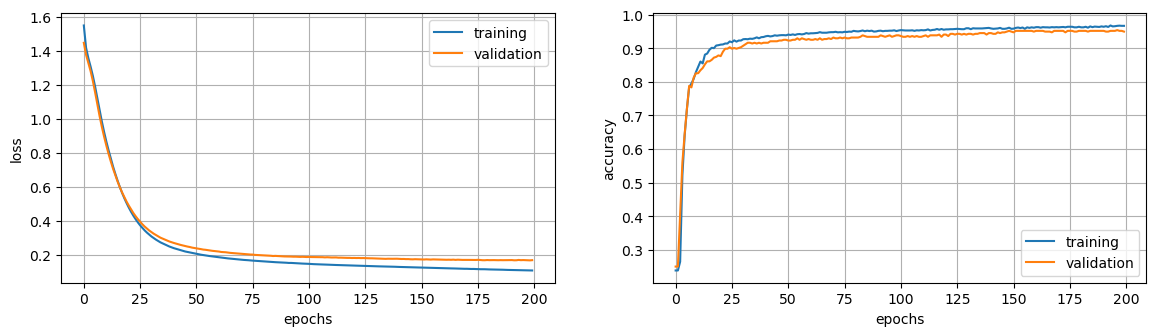

In [129]:
plt.figure(figsize=(14,3.5))

plt.subplot(1,2,1)     
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2)     
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')Skipped non-installed server(s): bash-language-server, dockerfile-language-server-nodejs, javascript-typescript-langserver, jedi-language-server, julia-language-server, pyright, python-language-server, python-lsp-server, r-languageserver, sql-language-server, texlab, typescript-language-server, unified-language-server, vscode-css-languageserver-bin, vscode-html-languageserver-bin, vscode-json-languageserver-bin, yaml-language-server

plt.legend()
plt.grid()
plt.show()

In [130]:
evaluation_train_set = model.evaluate(X_train, y_train_neuro)

71/71 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9637


In [131]:
evaluation_test_set = model.evaluate(X_test,y_test_neuro)

18/18 [==============================] - 0s 1ms/step - loss: 0.2035 - accuracy: 0.9240


#### Prédiction du reseau de neurone

On obtient les prédictions suivantes.

In [132]:
csv_files = glob.glob('data/artists/*.csv')

In [133]:
predict = []
for name in csv_files:
    
    data_artist = normalisation(pd.read_csv(f'{name}'))
    y_artist = data_artist['genre'].replace(['rock', 'rap', 'classique', 'electro'], [0,1,2,3])
    
    y_pred_artist = model.predict(data_artist.drop(['genre'],axis=1),verbose=0)
    y_pred_artist = np.argmax(y_pred_artist,axis=1)
    
    predict.append(sklearn.metrics.accuracy_score(y_pred_artist, y_artist))
    print(round(sklearn.metrics.accuracy_score(y_pred_artist, y_artist),2), name[13:-4])

print('\n La moyenne du score des prédictions est de : ', round(np.mean(predict),3))

0.82 acdc
0.9 bach
0.92 drake
0.92 rollingstones
0.36 deadmau5
1.0 brahms
0.16 daftpunk
0.95 cardib
0.14 aphextwins
0.9 kendricklamar
0.96 travisscott
0.98 beatles
0.98 drpeacock
0.06 kraftwerk
0.18 chemicalbrothers
0.14 majorlazer
1.0 chopin
0.86 queen
0.94 jcole
1.0 ledzepplin
0.94 mozart
1.0 beethoven

total :  0.733


In [134]:
#model.save('neural_music')

## **IV. Comparaison des modèles et conclusion**

Maintenant que nous avons présenté nos différents modèles de classification de genres musicaux, nous allons les comparer et analyser leurs performances respectives. Cette étape est essentielle pour déterminer le modèle le plus adapté à notre problématique, et ainsi en tirer des conclusions pertinentes.

Nous pouvons dans un premier temps évaluer le score et la performance global de chaque algorithme sur nos artistes.

Nous voyons que les algorithmes ont des scores qui tournent aux alentours de 70%. L'algorithme du plus performant au moins performant est le réseau de neurones, RandomForest, DecisionTree, KNN puis l'approche bayésienne.

La comparaison du score global nous permet d'avoir une vision globale de la performance de chaque modèle, en considérant l'ensemble des genres musicaux. Cette analyse nous permet d'identifier les modèles les plus performants de manière générale, mais ne nous donne pas d'informations détaillées sur la performance de chaque modèle pour chaque genre musical. Les scores globaux n'étant pas très élevés, nous pouvons nous demander si certains genres ne sont pas plus durs à prédire que d'autres.

Ainsi, la comparaison du score global nous donne une première indication sur la capacité de chaque modèle à prédire les genres musicaux, mais pour une analyse plus fine, il est nécessaire de zoomer sur les scores par genre, afin de déterminer la performance de chaque modèle pour chaque genre musical en particulier. Cela peut nous aider à identifier les modèles qui ont des difficultés à prédire certains genres, et à orienter nos efforts d'optimisation en conséquence.

De plus, nous avons vu dans la data visualisation que les faibles distances euclidiennes entre le rock, le rap, et l'électro risquaient de nous poser problème.

Dans une seconde partie, il est alors pertinent de zoomer sur la performance des algorithmes en fonction du genre. Pour cela, nous avons tracer les matrices de confusion pour chaque méthode.

Nous voyons que tous les algorithmes commettent, sur certaines chansons, la confusion entre rock et rap. Néanmoins, pour l'algorithme de RandomForest cette erreur est moins importante. Ainsi, comme il s'agit d'un algorithme moins affecté que les autres par les distances entre les echantillons il est normal qu'il obtienne de meilleur résultat  que les autres sur ces deux genres.

Ensuite, nous observons la présence d'une erreur systématique dans nos algorithmes. Les perfomances sont très mauvaises pour l'électro. Contrairement à la confusion rock/rap cette erreur de par son importance, ne peut être seulement due à une proximité entre les caractéristiques acoustiques. En effet, on peut supposer un biais dans nos données. L'électro comportant beaucoup de sous-genres et étant lui même un genre qui se distingue par des caractéristique sonores très particulière nous pouvons nous interroger sur le choix des musiques d'entraînelent pour ce genre. Il est possible qu'il ne soit pas représentatif du genre et assez diversifié. 

Une piste d'amélioration future pourrait être de collecter plus de données pour le genre 'électro', en veillant à la diversité et à la représentativité des musiques d'entraînement.

Pour améliorer la distinction rap/rock, une piste serait de combiner différents algorithmes de classification, qui ont montré des performances satisfaisantes sur ces deux genres musicaux en particulier. Par exemple, on pourrait utiliser un modèle de réseau de neurones en combinaison avec un modèle de Random Forest.

Une autre piste serait de travailler sur les caractéristiques des chansons utilisées pour l'entraînement des algorithmes. Il est possible que certaines caractéristiques acoustiques soient plus discriminantes pour le rock et le rap que pour les autres par exemple. Il serait donc intéressant de mener une analyse plus fine de ces caractéristiques, afin de les identifier et de les utiliser pour entraîner nos modèles en leur augmentant leur poids lorsqu'on a identifié que le morceau passé avait de grandes chances d'être du rock ou du rap.